# Apartement Rent Data
Dataset source: https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data/data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load data

In [2]:
df = pd.read_csv('../../Datasets/Apartement Rent Data/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv',
                 sep=';',
                 encoding='cp1252',
                low_memory=False)

In [45]:
df.shape

(99492, 22)

In [54]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [55]:
train,test = train_test_split(df,shuffle=True,test_size=0.1,random_state=42)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('price',axis=1),
                                                 train['price'],
                                                shuffle=True,
                                                test_size=0.2,
                                                random_state=42)

# Data Preprocessing

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89541 entries, 16265 to 15796
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             89541 non-null  int64  
 1   category       89541 non-null  object 
 2   title          89541 non-null  object 
 3   body           89541 non-null  object 
 4   amenities      75093 non-null  object 
 5   bathrooms      89485 non-null  float64
 6   bedrooms       89425 non-null  float64
 7   currency       89541 non-null  object 
 8   fee            89541 non-null  object 
 9   has_photo      89541 non-null  object 
 10  pets_allowed   35251 non-null  object 
 11  price          89541 non-null  float64
 12  price_display  89541 non-null  object 
 13  price_type     89541 non-null  object 
 14  square_feet    89541 non-null  int64  
 15  address        7147 non-null   object 
 16  cityname       89265 non-null  object 
 17  state          89265 non-null  object 
 18  latitud

In [58]:
train.drop('price_display',axis=1,inplace=True)

## Handling Missing Data

In [35]:
na_mean = train.isna().mean()
na_cat = na_mean[na_mean > 0]

In [36]:
na_cat

amenities       0.161779
bathrooms       0.000637
bedrooms        0.001240
pets_allowed    0.606888
price           0.000011
address         0.920093
cityname        0.003027
state           0.003027
latitude        0.000246
longitude       0.000246
dtype: float64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >, <Axes: >]],
      dtype=object)

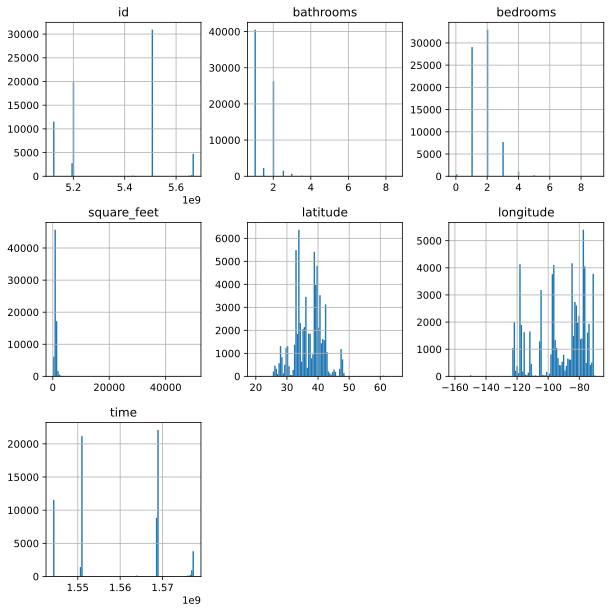

In [70]:
X_train.select_dtypes(include='number').hist(bins=100,figsize=(10,10))

In [80]:
feature_numerical = list(set(X_train.select_dtypes(include='number').columns) - {'latitude','longtitude','id'})
feature_categorical = list(list(X_train.select_dtypes(exclude='number').columns) + ['latitude','longtitude'])

In [ ]:
feat

In [69]:
X_train['square_feet'].value_counts()

square_feet
1000    1036
700     1002
900     1002
800      971
750      851
        ... 
4009       1
1902       1
1946       1
2218       1
2528       1
Name: count, Length: 2345, dtype: int64

In [66]:
train['square_feet']

16265     525
55875     600
14763    1290
50842     960
10745    1153
         ... 
6265     1750
54887    1045
76821     778
860       530
15796     648
Name: square_feet, Length: 89541, dtype: int64

## Category

In [18]:
unique_categories = df.category.unique()

In [19]:
all_categories = []
for categories in unique_categories:
    categories = categories.split('/')
    for c in categories:
        all_categories.append(c)

In [20]:
unique_categories = list(set(all_categories))

In [21]:
unique_categories

['commercial',
 'home',
 'rent',
 'apartment',
 'other',
 'housing',
 'retail',
 'condo',
 'short_term']

In [22]:
for i in unique_categories:
    df[f'cat_{i}'] = df.category.apply(lambda x : 1 if i in x else 0)

In [29]:
df.drop('category',axis=1,inplace=True)

## Amenities

In [46]:
df.amenities.fillna('Missing',inplace=True)

In [47]:
unique_amenities = df.amenities.unique()

In [48]:
unique_amenities

array(['Missing', 'Fireplace,Gym,Parking,Pool,Storage,Wood Floors',
       'Gated,Pool', ..., 'Dishwasher,Doorman',
       'AC,Elevator,Parking,Patio/Deck,Pool,Washer Dryer',
       'Dishwasher,Doorman,Patio/Deck,Refrigerator,Storage,Washer Dryer,Wood Floors'],
      dtype=object)

In [49]:
all_amenities = []
for amenities in unique_amenities:
    amenities = amenities.split(',')
    for a in amenities:
        all_amenities.append(a)

In [50]:
unique_amenities = list(set(all_amenities))

In [51]:
unique_amenities

['Pool',
 'Patio/Deck',
 'Missing',
 'Alarm',
 'View',
 'Gated',
 'Washer Dryer',
 'Luxury',
 'Doorman',
 'Internet Access',
 'Golf',
 'Basketball',
 'Dishwasher',
 'Gym',
 'Tennis',
 'Elevator',
 'Hot Tub',
 'Wood Floors',
 'Fireplace',
 'Garbage Disposal',
 'AC',
 'Cable or Satellite',
 'Clubhouse',
 'Playground',
 'Storage',
 'Parking',
 'TV',
 'Refrigerator']

In [52]:
for i in unique_amenities:
    df[f'ame_{i}'] = df.amenities.apply(lambda x : 1 if i in x else 0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      99492 non-null  int64  
 1   title                   99492 non-null  object 
 2   body                    99492 non-null  object 
 3   amenities               99492 non-null  object 
 4   bathrooms               99429 non-null  float64
 5   bedrooms                99368 non-null  float64
 6   currency                99492 non-null  object 
 7   fee                     99492 non-null  object 
 8   has_photo               99492 non-null  object 
 9   pets_allowed            39068 non-null  object 
 10  price                   99491 non-null  float64
 11  price_display           99491 non-null  object 
 12  price_type              99492 non-null  object 
 13  square_feet             99492 non-null  int64  
 14  address                 7943 non-null 

In [62]:
df.drop('amenities',axis=1,inplace=True)